In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import mnist


c:\Users\Charcha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()
    

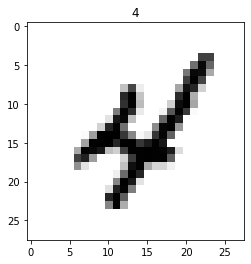

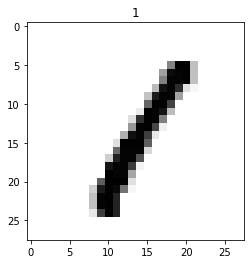

In [5]:
plot_input_img(9)
plot_input_img(3)

## Pre Process the images

In [6]:
print(X_train[9]) #checking the pixel values

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

# Normalizinng the data


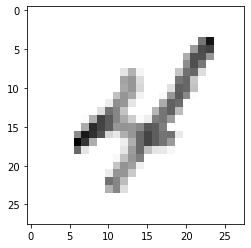

In [7]:
# gray sacle image so pixel values are between 0 and 255 
# we need to normalize the data to be between 0 and 1
X_train = tf.keras.utils.normalize(X_train, axis=1) # or X_train = X_train/255
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[9], cmap='binary')

After normalization

In [8]:
print(X_train[9]) #checking the pixel values

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Resizing image 

In [9]:
img_size = 28
# Reshaping the data from 28x28 to 28x28x1 to fit the input dimensions in Conv2D layer in keras
# 1 for grayscale and 3 for RGB
X_trainr = np.array(X_train).reshape(-1, img_size, img_size, 1) 
X_testr = np.array(X_test).reshape(-1, img_size, img_size, 1)
print("Training samples dimension:", X_trainr.shape)
print("Testing samples dimension:", X_testr.shape)

Training samples dimension: (60000, 28, 28, 1)
Testing samples dimension: (10000, 28, 28, 1)


# Creating a Deep Neural Network


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

In [11]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=X_trainr.shape[1:], activation='relu')) # what is convo2D -> it is a layer that extracts features from a source image. These features are commonly learned by sliding a convolutional kernel (filter) across the input image.
model.add(MaxPooling2D((2,2))) # what is MaxPooling2D -> it is a technique used to reduce the number of parameters in our model by downsampling the feature maps.

# 2nd Convolutional Layer
model.add(Conv2D(64, (3,3), activation='relu')) # what is relu -> it is an activation function that is used to increase the non-linearity in our model. It is an element-wise operation (applied per pixel) and replaces all negative pixel values in the feature map by zero.
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling is used to reduce the spatial dimensions of a given image.

# 3rd Convolutional Layer
model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D((2,2)))

# Flatten the layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(64, 'relu')) # what is Dense -> it is a fully connected layer. It is used to connect all neurons in one layer to every neuron in the next layer.

# Dropout layer
model.add(Dropout(0.25)) # it is regularization technique that prevents overfitting

# 2nd Dense Layer
model.add(Dense(32, activation='relu'))


# Output Layer
model.add(Dense(10, activation='softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks

In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1 )
mc = ModelCheckpoint('./best_model.h5', monitor='val_acc', verbose=1, save_best_only=True)

cb = [es, mc]

In [15]:
model.fit(X_train, y_train, epochs= 50, validation_split=0.3, callbacks=cb)

Epoch 1/50
1313/1313 [==============================] - 44s 31ms/step - loss: 0.4208 - accuracy: 0.8668 - val_loss: 0.1366 - val_accuracy: 0.9576
Epoch 2/50
1313/1313 [==============================] - 35s 27ms/step - loss: 0.1327 - accuracy: 0.9603 - val_loss: 0.0902 - val_accuracy: 0.9727
Epoch 3/50
1313/1313 [==============================] - 35s 26ms/step - loss: 0.0975 - accuracy: 0.9709 - val_loss: 0.0737 - val_accuracy: 0.9775
Epoch 4/50
1313/1313 [==============================] - 43s 32ms/step - loss: 0.0748 - accuracy: 0.9777 - val_loss: 0.0702 - val_accuracy: 0.9785
Epoch 5/50
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0612 - accuracy: 0.9821 - val_loss: 0.0649 - val_accuracy: 0.9806
Epoch 6/50
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0525 - accuracy: 0.9843 - val_loss: 0.0655 - val_accuracy: 0.9800
Epoch 7/50
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0441 - accuracy: 0.9864 - val_loss: 0.0635 -

In [16]:
model.save('best_model', save_format='h5')


c:\Users\Charcha\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model_S = keras.models.load_model('C:/Users/Charcha/Music/ML/HandwrittenDigit/handwrittenDigit/best_model')


In [18]:
score = model_S.evaluate(X_test, y_test) 
print(f'Model Accuracy = {score[1]}') # score[0] is loss and score[1] is accuracy

313/313 [==============================] - 3s 8ms/step - loss: 0.0945 - accuracy: 0.9861
Model Accuracy = 0.9861000180244446
